In [1]:
import pandas as pd
import glob
import os

path_to_power_folder = r'......' # 👈 

# --- End of manual setting ---

if not os.path.isdir(path_to_power_folder):
    print(f"Error: The folder '{path_to_power_folder}' does not exist.")
    print("Please ensure you have entered the correct full path to your 'power' folder.")
else:
    print(f"Searching for .xlsx files in: {path_to_power_folder} and its subfolders (like Native_Load_2024, etc.)...")
    
    excel_files_pattern = os.path.join(path_to_power_folder, '**', '*.xlsx')
    excel_files = glob.glob(excel_files_pattern, recursive=True)

    all_data = {} 

    if not excel_files:
        print(f"No .xlsx files found in '{path_to_power_folder}' or its subfolders.")
    else:
        print(f"\nFound {len(excel_files)} Excel file(s):")
        for file_path in excel_files:
            print(f"- {file_path}") 
            try:
               
                relative_path_from_power = os.path.relpath(file_path, path_to_power_folder)
                key_name = os.path.splitext(relative_path_from_power)[0].replace(os.sep, '_')

                df_sheets = pd.read_excel(file_path, sheet_name=None)

                if isinstance(df_sheets, dict) and len(df_sheets) == 1:
                     all_data[key_name] = list(df_sheets.values())[0] # Store the single DataFrame
                else: # Store the dictionary of sheets
                     all_data[key_name] = df_sheets # Store the dictionary {sheet_name: DataFrame}

                print(f"  Successfully loaded '{file_path}' as '{key_name}'")

            except Exception as e:
                print(f"  Error loading '{file_path}': {e}")

    
    if all_data:
        print("\n--- DataFrames Loaded ---")
        print("You can access the data using the generated keys. For example:")
        # Show a few example keys
        for name in list(all_data.keys())[:3]:
            data_item = all_data[name]
            if isinstance(data_item, pd.DataFrame):
                print(f"  all_data['{name}'] (contains a single DataFrame)")
            elif isinstance(data_item, dict):
                sheet_names = list(data_item.keys())
                print(f"  all_data['{name}'] (contains a dictionary of sheets: {sheet_names})")
        if len(all_data.keys()) > 3:
            print("  ...")

       
        if all_data:
            first_file_key = list(all_data.keys())[0]
            first_file_content = all_data[first_file_key]
            print(f"\nPreview of first sheet from '{first_file_key}':")
            if isinstance(first_file_content, pd.DataFrame):
                print(first_file_content.head())
            elif isinstance(first_file_content, dict): # If it's a dictionary of sheets
                first_sheet_name = list(first_file_content.keys())[0]
                print(f"(Sheet: {first_sheet_name})")
                print(first_file_content[first_sheet_name].head())
    else:
        print("\nNo data was loaded.")

Searching for .xlsx files in: C:\Users\Victus\Downloads\power and its subfolders (like Native_Load_2024, etc.)...

Found 6 Excel file(s):
- C:\Users\Victus\Downloads\power\Native_Load_2019\Native_Load_2019.xlsx
  Successfully loaded 'C:\Users\Victus\Downloads\power\Native_Load_2019\Native_Load_2019.xlsx' as 'Native_Load_2019_Native_Load_2019'
- C:\Users\Victus\Downloads\power\Native_Load_2020\Native_Load_2020.xlsx
  Successfully loaded 'C:\Users\Victus\Downloads\power\Native_Load_2020\Native_Load_2020.xlsx' as 'Native_Load_2020_Native_Load_2020'
- C:\Users\Victus\Downloads\power\Native_Load_2021\Native_Load_2021.xlsx
  Successfully loaded 'C:\Users\Victus\Downloads\power\Native_Load_2021\Native_Load_2021.xlsx' as 'Native_Load_2021_Native_Load_2021'
- C:\Users\Victus\Downloads\power\Native_Load_2022\Native_Load_2022.xlsx
  Successfully loaded 'C:\Users\Victus\Downloads\power\Native_Load_2022\Native_Load_2022.xlsx' as 'Native_Load_2022_Native_Load_2022'
- C:\Users\Victus\Downloads\power\

In [2]:
all_data['Native_Load_2019_Native_Load_2019'].head()

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2019 01:00,9783.594839,1264.194059,3164.720629,827.759428,11697.766093,3066.891146,5993.974289,1282.542956,37081.443439
1,01/01/2019 02:00,9726.062326,1270.494294,3178.950849,830.256302,11787.936174,3140.383209,6029.773970,1295.132811,37258.989933
2,01/01/2019 03:00,9654.373521,1269.504203,3200.881160,831.505553,11861.628382,3137.721342,6043.348512,1301.225133,37300.187809
3,01/01/2019 04:00,9631.735303,1243.168422,3221.963116,839.689838,11989.105118,3105.497101,6086.408464,1305.976101,37423.543464
4,01/01/2019 05:00,9698.889228,1309.572865,3240.634870,848.672153,12219.106347,3078.256356,6180.939962,1319.140512,37895.212293


In [3]:
all_data['Native_Load_2024_Native_Load_2024'].head()

,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2024 01:00,10484.137154,1375.738368,6210.082088,1250.403165,11799.512618,2929.799758,6020.385247,1153.421779,41223.480177
1,01/01/2024 02:00,10365.816869,1455.235587,6223.669226,1272.979716,12094.701362,2916.987913,5987.545519,1162.463555,41479.399746
2,01/01/2024 03:00,10206.968091,1396.973111,6270.219255,1290.712338,12414.588720,2835.801915,5874.877381,1182.629316,41472.770126
3,01/01/2024 04:00,10086.531805,1423.999194,6263.889506,1311.941858,12609.781073,2783.932530,5789.148918,1208.215907,41477.440791
4,01/01/2024 05:00,10097.438645,1507.465340,6281.784102,1335.537947,13158.831370,2741.224809,5816.637897,1245.272845,42184.192955


In [4]:

list_of_dataframes = []

sorted_keys = sorted(all_data.keys())

print("Combining DataFrames and standardizing 'HourEnding' column:")
for key in sorted_keys:
    print(f"- Processing key: {key}")
    item_to_process = all_data[key]
    df_year = None  # Initialize df_year

    if isinstance(item_to_process, pd.DataFrame):
        df_year = item_to_process.copy() 
    elif isinstance(item_to_process, dict):
       
        if item_to_process.keys():
            first_sheet_name = list(item_to_process.keys())[0]
            df_year = item_to_process[first_sheet_name].copy() # Use a copy
            print(f"  Extracted first sheet ('{first_sheet_name}') as DataFrame.")
        else:
            print(f"  Warning: Item for '{key}' is an empty dictionary of sheets. Skipping.")
            continue
    else:
        print(f"  Warning: Item for '{key}' is not a DataFrame or a dictionary. Type: {type(item_to_process)}. Skipping.")
        continue


    if df_year is not None:
        if 'Hour Ending' in df_year.columns and 'HourEnding' not in df_year.columns:
            print(f"  Found 'Hour Ending'. Renaming to 'HourEnding'.")
            df_year.rename(columns={'Hour Ending': 'HourEnding'}, inplace=True)
        elif 'HourEnding' in df_year.columns:
            print(f"  Found 'HourEnding'. No rename needed for timestamp column.")
        else:
            print(f"  Warning: Neither 'HourEnding' nor 'Hour Ending' found in columns: {df_year.columns.tolist()}. Skipping this DataFrame.")
            continue 
        if 'HourEnding' in df_year.columns:
            list_of_dataframes.append(df_year)

if list_of_dataframes:
    combined_df = pd.concat(list_of_dataframes, ignore_index=True)
    print("\nSuccessfully combined DataFrames.")
    print(f"Total rows in combined DataFrame: {len(combined_df)}")
    print("First few rows of combined_df:")
    print(combined_df.head())
    print("\nLast few rows of combined_df:")
    print(combined_df.tail())


Combining DataFrames and standardizing 'HourEnding' column:
- Processing key: Native_Load_2019_Native_Load_2019
  Found 'HourEnding'. No rename needed for timestamp column.
- Processing key: Native_Load_2020_Native_Load_2020
  Found 'HourEnding'. No rename needed for timestamp column.
- Processing key: Native_Load_2021_Native_Load_2021
  Found 'Hour Ending'. Renaming to 'HourEnding'.
- Processing key: Native_Load_2022_Native_Load_2022
  Found 'Hour Ending'. Renaming to 'HourEnding'.
- Processing key: Native_Load_2023_Native_Load_2023
  Found 'Hour Ending'. Renaming to 'HourEnding'.
- Processing key: Native_Load_2024_Native_Load_2024
  Found 'Hour Ending'. Renaming to 'HourEnding'.

Successfully combined DataFrames.
Total rows in combined DataFrame: 52608
First few rows of combined_df:
         HourEnding        COAST         EAST        FWEST       NORTH  \
0  01/01/2019 01:00  9783.594839  1264.194059  3164.720629  827.759428   
1  01/01/2019 02:00  9726.062326  1270.494294  3178.9508

In [5]:

print("\n--- Step 1: Splitting 'HourEnding' into Date and Time string columns ---")

combined_df['HourEnding'] = combined_df['HourEnding'].astype(str).str.strip()


split_datetime = combined_df['HourEnding'].str.rsplit(' ', n=1, expand=True)
combined_df['Date_Str'] = split_datetime[0]
combined_df['Time_Str'] = split_datetime[1]

print("Created 'Date_Str' and 'Time_Str' columns.")
print(combined_df[['HourEnding', 'Date_Str', 'Time_Str']].head())



--- Step 1: Splitting 'HourEnding' into Date and Time string columns ---
Created 'Date_Str' and 'Time_Str' columns.
         HourEnding    Date_Str Time_Str
0  01/01/2019 01:00  01/01/2019    01:00
1  01/01/2019 02:00  01/01/2019    02:00
2  01/01/2019 03:00  01/01/2019    03:00
3  01/01/2019 04:00  01/01/2019    04:00
4  01/01/2019 05:00  01/01/2019    05:00


In [6]:

print("Columns before dropping:", combined_df.columns.tolist())

columns_to_drop = ['HourEnding', 'Time_Str','Corrected_Date_Str']
existing_columns_to_drop = [col for col in columns_to_drop if col in combined_df.columns]

if existing_columns_to_drop:
    combined_df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"\nSuccessfully dropped columns: {existing_columns_to_drop}")
else:
    print(f"\nNo columns from the list {columns_to_drop} were found to drop.")

print("\nColumns after dropping:")
print(combined_df.columns.tolist())

print("\nFirst few rows of the DataFrame after dropping columns:")
print(combined_df.head())

Columns before dropping: ['HourEnding', 'COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT', 'Date_Str', 'Time_Str']

Successfully dropped columns: ['HourEnding', 'Time_Str']

Columns after dropping:
['COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT', 'Date_Str']

First few rows of the DataFrame after dropping columns:
         COAST         EAST        FWEST       NORTH         NCENT  \
0  9783.594839  1264.194059  3164.720629  827.759428  11697.766093   
1  9726.062326  1270.494294  3178.950849  830.256302  11787.936174   
2  9654.373521  1269.504203  3200.881160  831.505553  11861.628382   
3  9631.735303  1243.168422  3221.963116  839.689838  11989.105118   
4  9698.889228  1309.572865  3240.634870  848.672153  12219.106347   

         SOUTH        SCENT         WEST         ERCOT    Date_Str  
0  3066.891146  5993.974289  1282.542956  37081.443439  01/01/2019  
1  3140.383209  6029.773970  1295.132811  37258.989933  01/01/2019

In [7]:
distinct_date_strings = combined_df['Date_Str'].unique()
print("Distinct values in 'Date_Str':")
print(distinct_date_strings)

print(f"\nNumber of distinct date strings: {len(distinct_date_strings)}")

Distinct values in 'Date_Str':
['01/01/2019' '01/02/2019' '01/03/2019' ... '12/29/2024' '12/30/2024'
 '12/31/2024']

Number of distinct date strings: 2199


In [8]:

date_strings = combined_df['Date_Str'].astype(str)
parsed_dates = pd.to_datetime(date_strings, format='%m/%d/%Y', errors='coerce')

problematic_strings = date_strings[parsed_dates.isnull()]

if not problematic_strings.empty:
    print("Found date strings that do NOT match the 'MM/DD/YYYY' template:")

    unique_problematic_strings = problematic_strings.unique()
    for s in unique_problematic_strings:
        print(f"- '{s}'")
    print(f"\nNumber of unique 'other template' strings: {len(unique_problematic_strings)}")

else:
    print("All date strings in 'Date_Str' appear to conform to the 'MM/DD/YYYY' template.")

Found date strings that do NOT match the 'MM/DD/YYYY' template:
- '11/03/2019 02:00'
- '11/01/2020 02:00'
- '11/07/2021 02:00'
- '11/06/2022 02:00'
- '2022-12-01'
- '11/05/2023 02:00'
- '11/03/2024 02:00'

Number of unique 'other template' strings: 7


In [9]:

def standardize_my_date_strings(date_str_value):
    s = str(date_str_value).strip() 
    parts = s.split(' ', 1)
    if len(parts) > 1 and ':' in parts[1]:
        date_candidate = parts[0]
       
        try:
            pd.to_datetime(date_candidate, format='%m/%d/%Y')
            return date_candidate 
        except ValueError:
            pass
    if '-' in s and s.count('-') == 2:
        try:

            dt_obj = pd.to_datetime(s)
           
            return dt_obj.strftime('%m/%d/%Y')
        except ValueError:
            pass 
    return s

print("Standardizing 'Date_Str' column for specific patterns...")
combined_df['Date_Str'] = combined_df['Date_Str'].apply(standardize_my_date_strings)

print("\n'Date_Str' column processed.")
print("Unique values in 'Date_Str' after manual standardization (sample):")

unique_after_manual = combined_df['Date_Str'].unique()
for val in unique_after_manual[:15]: 
    print(f"- '{val}'")
if len(unique_after_manual) > 15:
    print("... and possibly more.")


Standardizing 'Date_Str' column for specific patterns...

'Date_Str' column processed.
Unique values in 'Date_Str' after manual standardization (sample):
- '01/01/2019'
- '01/02/2019'
- '01/03/2019'
- '01/04/2019'
- '01/05/2019'
- '01/06/2019'
- '01/07/2019'
- '01/08/2019'
- '01/09/2019'
- '01/10/2019'
- '01/11/2019'
- '01/12/2019'
- '01/13/2019'
- '01/14/2019'
- '01/15/2019'
... and possibly more.


In [10]:

date_strings = combined_df['Date_Str'].astype(str)

parsed_dates = pd.to_datetime(date_strings, format='%m/%d/%Y', errors='coerce')

problematic_strings = date_strings[parsed_dates.isnull()]

if not problematic_strings.empty:
    print("Found date strings that do NOT match the 'MM/DD/YYYY' template:")

    unique_problematic_strings = problematic_strings.unique()
    for s in unique_problematic_strings:
        print(f"- '{s}'")
    print(f"\nNumber of unique 'other template' strings: {len(unique_problematic_strings)}")

else:
    print("All date strings in 'Date_Str' appear to conform to the 'MM/DD/YYYY' template.")

All date strings in 'Date_Str' appear to conform to the 'MM/DD/YYYY' template.


In [11]:
columns_to_average = [col for col in combined_df.columns if col != 'Date_Str']

print(f"Averaging columns: {columns_to_average}")
daily_avg_df = combined_df.groupby('Date_Str')[columns_to_average].mean()

print("\nDaily averages calculated. First few rows of 'daily_avg_df':")
print(daily_avg_df.head())

Averaging columns: ['COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT']

Daily averages calculated. First few rows of 'daily_avg_df':
                   COAST         EAST        FWEST       NORTH         NCENT  \
Date_Str                                                                       
01/01/2019   9835.072243  1342.065574  3337.755616  952.074546  14237.582026   
01/01/2020  10189.262049  1401.362992  3772.146610  802.967531  12393.857667   
01/01/2021  11331.411773  1716.283508  3908.891214  885.148374  14742.738225   
01/01/2022  12621.031530  1370.032952  4179.283170  966.121097  11063.915711   
01/01/2023   9203.995377  1294.777002  4998.023365  906.341233  10502.169233   

                  SOUTH        SCENT         WEST         ERCOT  
Date_Str                                                         
01/01/2019  3089.532910  6869.778275  1446.545169  41110.406359  
01/01/2020  2851.134206  5890.629077  1217.794728  38519.154858  
01/01/2021  33

In [12]:

try:
    # Assuming the standardized 'Date_Str' is now consistently "MM/DD/YYYY"
    daily_avg_df.index = pd.to_datetime(daily_avg_df.index, format='%m/%d/%Y')
    print("\nIndex converted to datetime objects successfully.")
    

    daily_avg_df.sort_index(inplace=True)
    print("Index sorted.")
    
    print("\nFinal 'daily_avg_df' with datetime index (first few rows):")
    print(daily_avg_df.head())
    print("\nData type of index:", daily_avg_df.index.dtype)
    
except ValueError as e:
    print(f"\nError converting index to datetime: {e}")
    print("There might still be some unexpected date string formats in the index.")
    print("You can inspect 'daily_avg_df.index.unique()' to see them.")



Index converted to datetime objects successfully.
Index sorted.

Final 'daily_avg_df' with datetime index (first few rows):
                   COAST         EAST        FWEST        NORTH         NCENT  \
Date_Str                                                                        
2019-01-01   9835.072243  1342.065574  3337.755616   952.074546  14237.582026   
2019-01-02  10828.690864  1516.727930  3459.264348  1062.543287  17028.166214   
2019-01-03  11132.337483  1562.253832  3253.176214  1005.743944  16263.325872   
2019-01-04  11211.108010  1506.886188  3169.708609   891.551722  13878.502687   
2019-01-05   9972.598946  1317.798399  3108.640500   802.095254  12153.840540   

                  SOUTH        SCENT         WEST         ERCOT  
Date_Str                                                         
2019-01-01  3089.532910  6869.778275  1446.545169  41110.406359  
2019-01-02  3806.017832  8090.290481  1568.937555  47360.638512  
2019-01-03  3733.356504  7446.050174  1473.

In [13]:
daily_avg_df.tail()

,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
Date_Str,,,,,,,,,
2024-12-27,11907.521950,1430.718056,7230.506951,1411.553271,12039.732801,3680.722080,6711.818590,1207.741902,45620.315601
2024-12-28,12033.713069,1390.152964,7125.492265,1380.880026,11681.625311,3696.635099,6572.783066,1111.302003,44992.583804
2024-12-29,11116.032486,1387.371586,7131.527020,1274.531034,11611.806465,3373.899904,6361.021663,1132.040850,43388.231007
2024-12-30,12195.003755,1455.724093,7205.144487,1293.624197,12181.370140,3673.874289,6802.215949,1145.856556,45952.813465
2024-12-31,11421.443507,1474.614560,7175.313374,1383.125173,12271.494287,3403.249740,6561.720328,1172.288548,44863.249518


In [14]:
import matplotlib.pyplot as plt


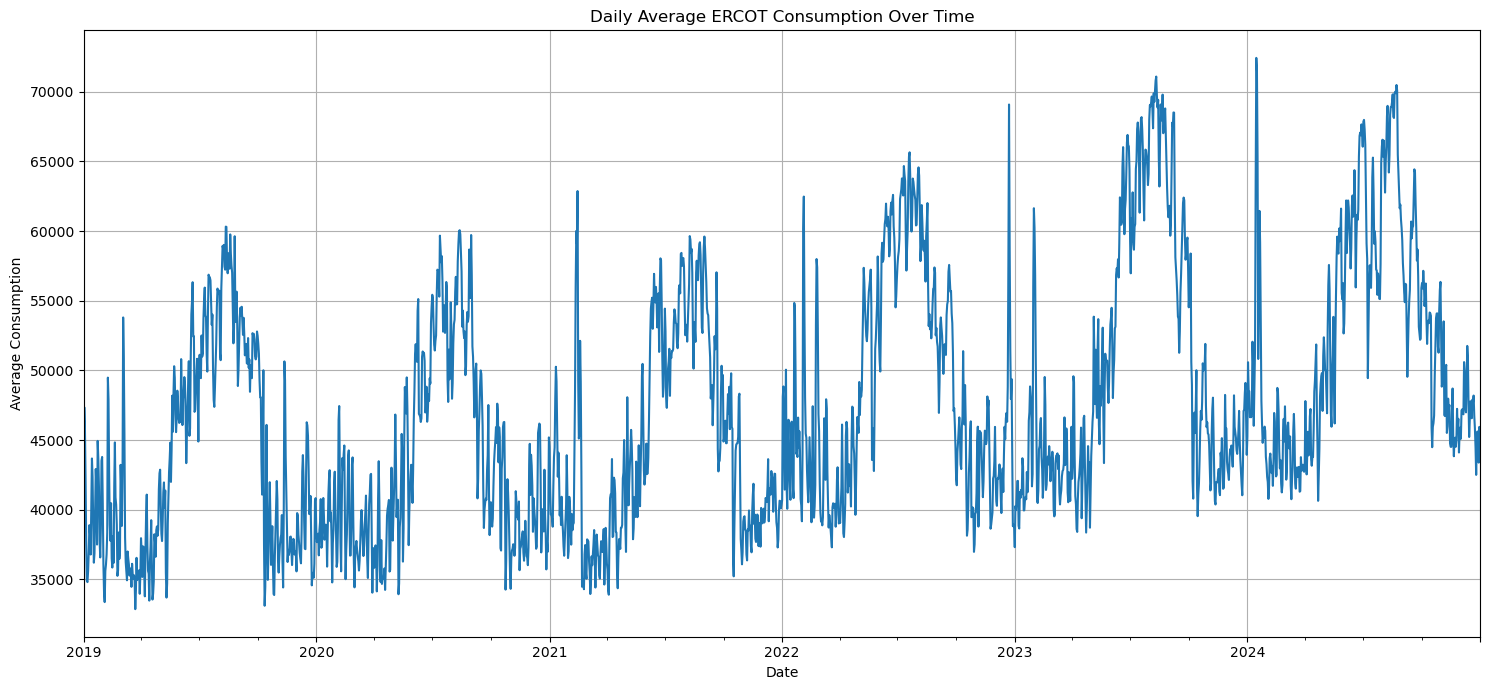

In [15]:

if 'ERCOT' in daily_avg_df.columns:
    plt.figure(figsize=(15, 7))
    daily_avg_df['ERCOT'].plot()
    plt.title('Daily Average ERCOT Consumption Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Consumption')
    plt.grid(True) 
    plt.tight_layout() 
    plt.show()
else:
    print("The 'ERCOT' column is not found in your daily_avg_df.")
    print(f"Available columns are: {daily_avg_df.columns.tolist()}")
    print("Please specify which column you'd like to plot.")

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


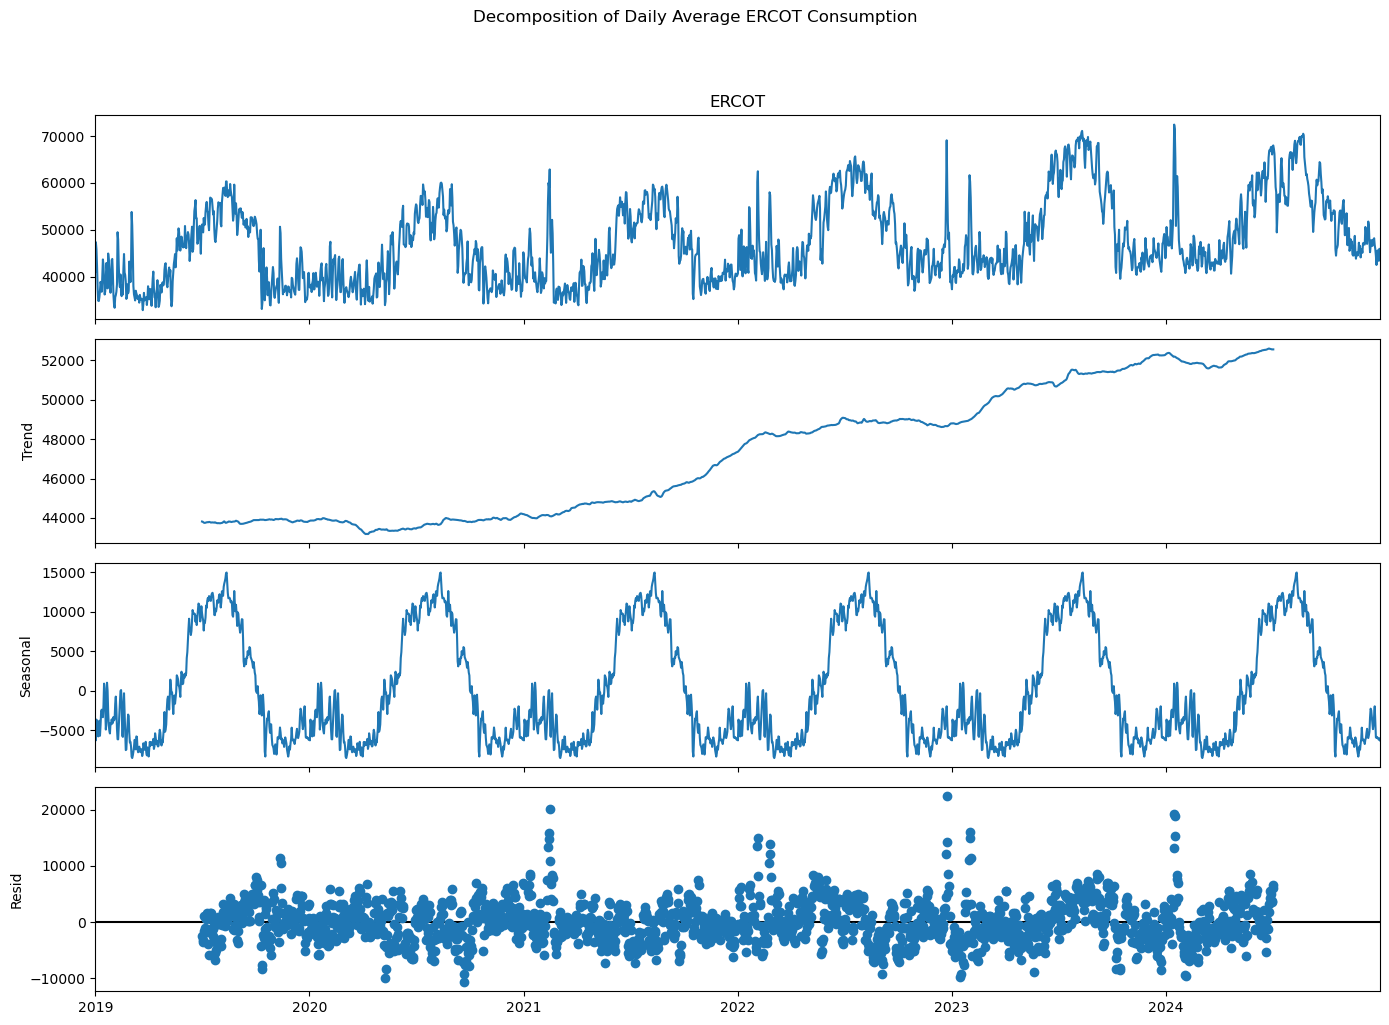

In [17]:

ercot_series_for_decomposition = daily_avg_df['ERCOT'].dropna()

if not ercot_series_for_decomposition.empty and len(ercot_series_for_decomposition) >= 365*2 :
    decomposition = seasonal_decompose(ercot_series_for_decomposition, model='additive', period=365)

    # Plot the decomposed components
    fig = decomposition.plot()
    fig.set_size_inches(14, 10) # Make the plot larger
    plt.suptitle('Decomposition of Daily Average ERCOT Consumption', y=1.02) # Add a main title
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
    plt.show()

    # You can also access the individual components:
    # trend = decomposition.trend
    # seasonal = decomposition.seasonal
    # residual = decomposition.resid
    # print("\nTrend component (first few values):")
    # print(trend.head())
    # print("\nSeasonal component (first few values):")
    # print(seasonal.head())
    # print("\nResidual component (first few values):")
    # print(residual.head())

elif ercot_series_for_decomposition.empty:
    print("The 'ERCOT' series is empty after dropping NaNs. Cannot perform decomposition.")
else:
    print(f"The 'ERCOT' series has only {len(ercot_series_for_decomposition)} data points after dropping NaNs.")
    print("More data (at least 2 full seasonal periods, e.g., 2*365=730 for daily data with yearly seasonality) is recommended for meaningful decomposition.")

In [18]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(ercot_series_for_decomposition)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Result: The series is likely stationary (p-value <= 0.05).")
else:
    print("Result: The series is likely non-stationary (p-value > 0.05).")

ADF Statistic: -2.967145
p-value: 0.038079
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Result: The series is likely stationary (p-value <= 0.05).


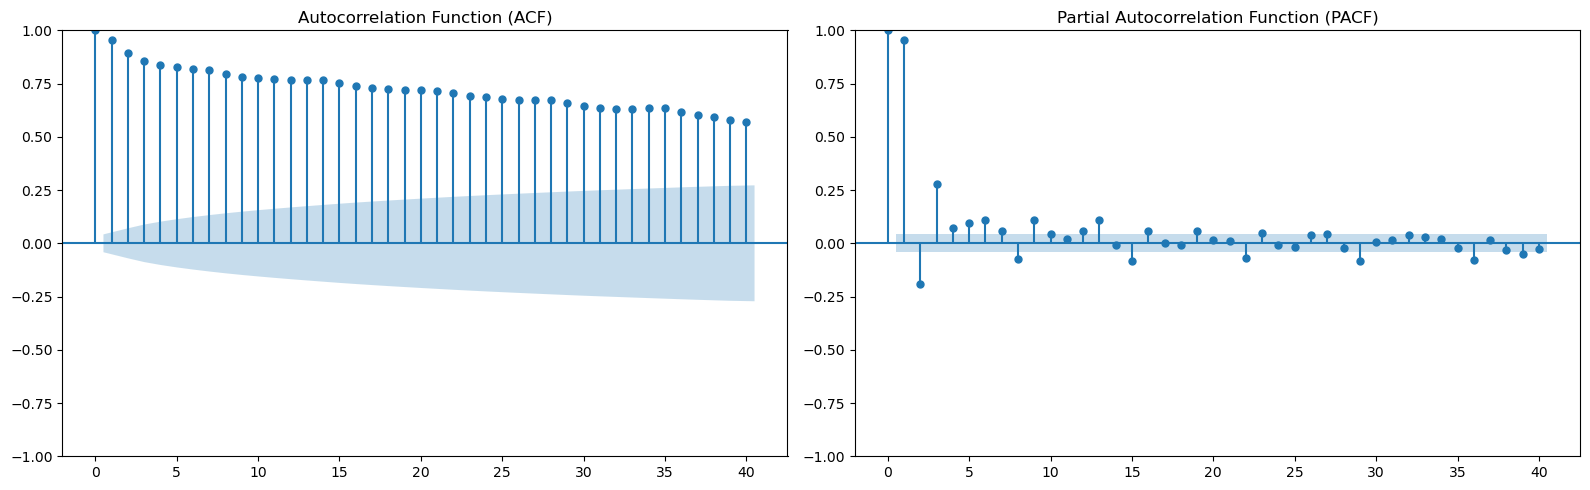

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Assuming 'ercot_series_for_decomposition' is your stationary series

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(ercot_series_for_decomposition, lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(ercot_series_for_decomposition, lags=40, ax=axes[1], method='ywm') # 'ywm' is a common method
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:

source_series = daily_avg_df['ERCOT'].dropna()

num_test_points = 2 * 365 

if len(source_series) > num_test_points:
    train_set = source_series[:-num_test_points]
    test_set = source_series[-num_test_points:]

    print(f"Full ERCOT series length: {len(source_series)}")
    print(f"Training set length: {len(train_set)}")
    print(f"Test set length: {len(test_set)}")

    print("\nLast date in training set:")
    print(train_set.tail(1))
    print("\nFirst date in test set:")
    print(test_set.head(1))
else:
    print(f"ERCOT series length ({len(source_series)}) is not enough to create a 2-year test set of {num_test_points} points.")
    train_set = source_series
    test_set = pd.Series(dtype=float)



Full ERCOT series length: 2192
Training set length: 1462
Test set length: 730

Last date in training set:
Date_Str
2023-01-01    37319.338888
Name: ERCOT, dtype: float64

First date in test set:
Date_Str
2023-01-02    40266.768442
Name: ERCOT, dtype: float64


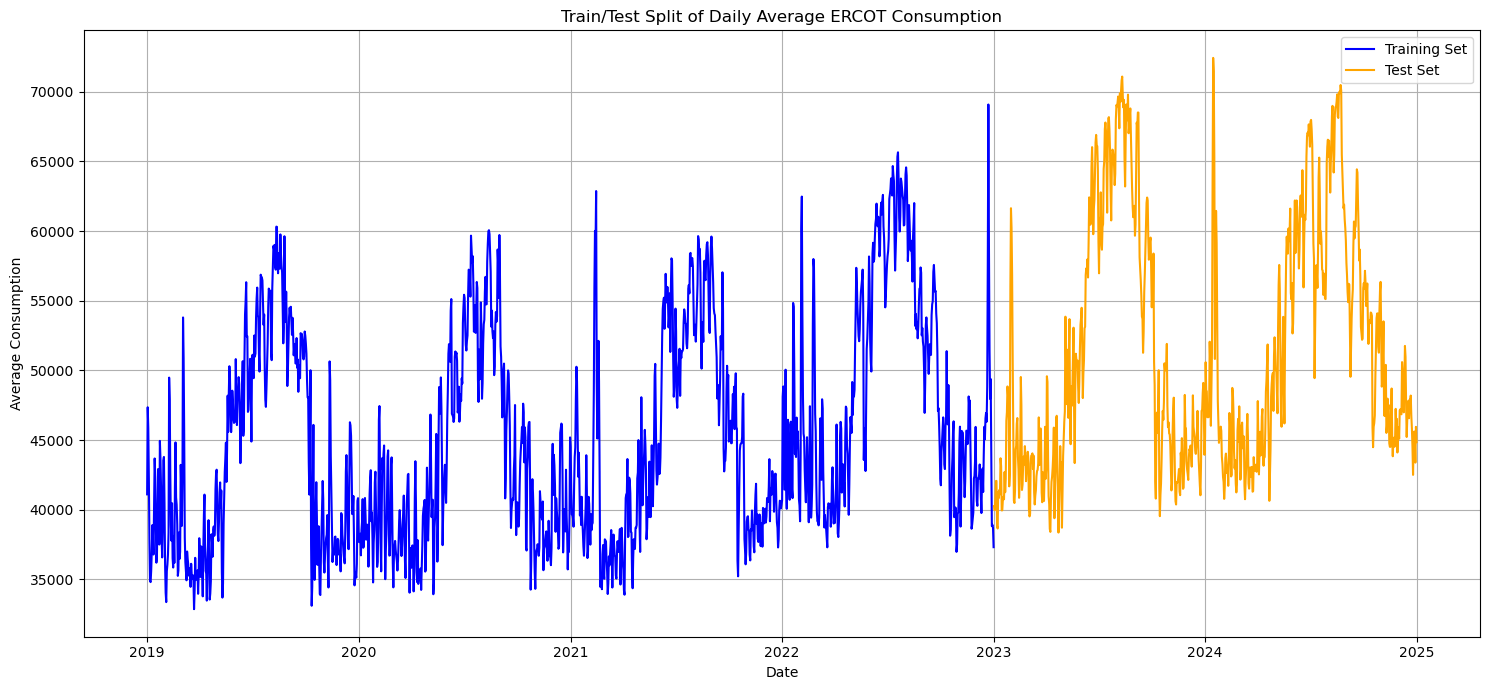

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'train_set' and 'test_set' were created in the previous step
# from daily_avg_df['ERCOT']

plt.figure(figsize=(15, 7))
plt.plot(train_set.index, train_set, label='Training Set', color='blue')
plt.plot(test_set.index, test_set, label='Test Set', color='orange')
plt.title('Train/Test Split of Daily Average ERCOT Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
train_set.head()

Date_Str
2019-01-01    41110.406359
2019-01-02    47360.638512
2019-01-03    45869.698046
2019-01-04    42238.630491
2019-01-05    37658.997761
Name: ERCOT, dtype: float64

In [24]:
import pandas as pd

# Assuming daily_avg_df is your DataFrame with a DatetimeIndex

if isinstance(daily_avg_df.index, pd.DatetimeIndex):
    date_diffs = daily_avg_df.index.to_series().diff()
    print("Time differences between consecutive dates in daily_avg_df index:")
    print(date_diffs.value_counts().sort_index())
else:
    print("The index of daily_avg_df is not a DatetimeIndex. Cannot check date differences easily.")

Time differences between consecutive dates in daily_avg_df index:
Date_Str
1 days    2191
Name: count, dtype: int64


In [25]:
daily_avg_df.head(20)

,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
Date_Str,,,,,,,,,
2019-01-01,9835.072243,1342.065574,3337.755616,952.074546,14237.582026,3089.532910,6869.778275,1446.545169,41110.406359
2019-01-02,10828.690864,1516.727930,3459.264348,1062.543287,17028.166214,3806.017832,8090.290481,1568.937555,47360.638512
2019-01-03,11132.337483,1562.253832,3253.176214,1005.743944,16263.325872,3733.356504,7446.050174,1473.454024,45869.698046
2019-01-04,11211.108010,1506.886188,3169.708609,891.551722,13878.502687,3448.913640,6794.474143,1337.485492,42238.630491
2019-01-05,9972.598946,1317.798399,3108.640500,802.095254,12153.840540,3039.392200,6034.747581,1229.884340,37658.997761
2019-01-06,9475.118264,1205.251839,3042.524744,744.400041,11027.897203,2748.222965,5518.657766,1130.660705,34892.733527
2019-01-07,9853.389194,1163.880604,3102.020703,711.252262,10655.833809,2844.548477,5396.183915,1084.415894,34811.524858
2019-01-08,9761.195295,1191.447332,3107.837844,777.641119,11452.987855,2862.257063,5330.100912,1133.637310,35617.104730
2019-01-09,9687.928346,1274.876076,3154.148720,820.838826,12417.444209,2788.270184,5653.067750,1176.124956,36972.699067


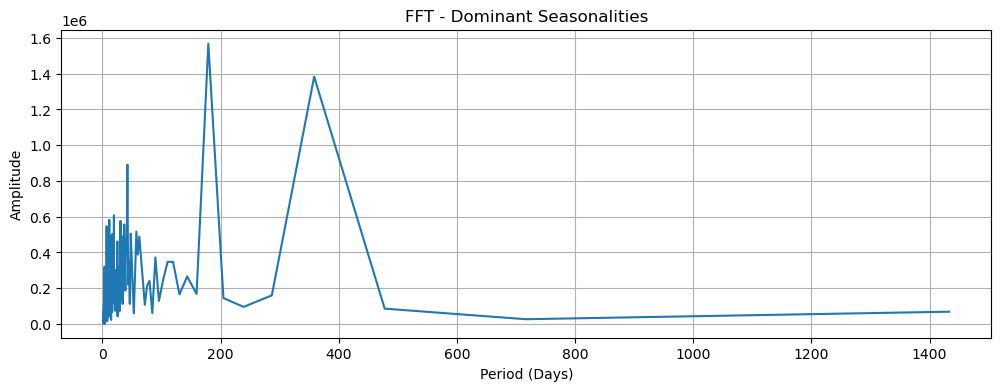

In [27]:
import numpy as np
from scipy.fft import fft

# Remove trend if needed
x = train_set - train_set.rolling(window=30).mean()
x = x.dropna().values

fft_vals = fft(x)
frequencies = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(12, 4))
plt.plot(1 / frequencies[1:len(x)//2], np.abs(fft_vals)[1:len(x)//2])
plt.title("FFT - Dominant Seasonalities")
plt.xlabel("Period (Days)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


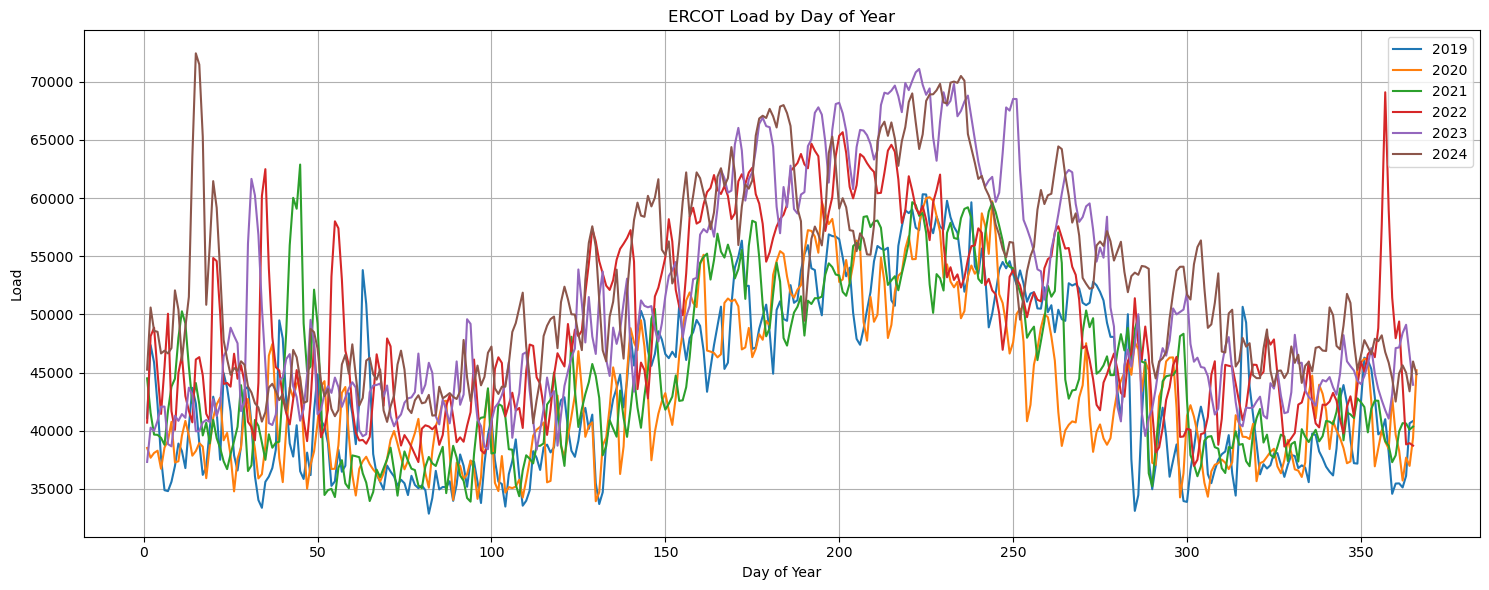

In [28]:

# Assume 'train_set' has a datetime index and daily values
df = daily_avg_df['ERCOT'].copy()
df = df.to_frame(name='load')
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear

# Plot
plt.figure(figsize=(15, 6))
for year, group in df.groupby('year'):
    plt.plot(group['dayofyear'], group['load'], label=year)

plt.title('ERCOT Load by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Load')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
!pip install prophet

In [30]:
source_series.tail()

Date_Str
2024-12-27    45620.315601
2024-12-28    44992.583804
2024-12-29    43388.231007
2024-12-30    45952.813465
2024-12-31    44863.249518
Name: ERCOT, dtype: float64

In [33]:
source_series_actual = source_series.copy()

In [34]:

source_series = daily_avg_df['ERCOT'].dropna()

# Ensure the index is a DatetimeIndex if it isn't already, for chronological splitting
if not isinstance(source_series_actual.index, pd.DatetimeIndex):
    source_series_actual.index = pd.to_datetime(source_series_actual.index)

# Sort by index to ensure chronological order, which is crucial for time series splits
source_series = source_series.sort_index()

print(f"Actual source_series_actual loaded with {len(source_series_actual)} data points.")

Actual source_series_actual loaded with 2192 data points.


In [35]:
source_series.tail()

Date_Str
2024-12-27    45620.315601
2024-12-28    44992.583804
2024-12-29    43388.231007
2024-12-30    45952.813465
2024-12-31    44863.249518
Name: ERCOT, dtype: float64

In [36]:
# Assuming source_series is your entire 6-year time series
total_data_points = len(source_series)

# Define split points based on years for a 6-year dataset (approx. 365 days/year)
# 4 years for training
# 1 year for validation
# 1 year for testing
num_test_points = 365 # Last 1 year for testing
num_validation_points = 365 # Preceding 1 year for validation

# Calculate the start index for the test set
test_start_index = total_data_points - num_test_points

# Calculate the start index for the validation set
validation_start_index = test_start_index - num_validation_points

# Redefine the splits using .iloc for positional indexing
train_set = source_series.iloc[:validation_start_index]
validation_set = source_series.iloc[validation_start_index:test_start_index]
test_set = source_series.iloc[test_start_index:]

print(f"Total data points: {total_data_points}")
print(f"Train set size: {len(train_set)} points (approx {len(train_set)/365:.1f} years)")
print(f"Validation set size: {len(validation_set)} points (approx {len(validation_set)/365:.1f} years)")
print(f"Test set size: {len(test_set)} points (approx {len(test_set)/365:.1f} years)")

# Make copies for safety
train_set_copy = train_set.copy()
validation_set_copy = validation_set.copy()
test_set_copy = test_set.copy()

Total data points: 2192
Train set size: 1462 points (approx 4.0 years)
Validation set size: 365 points (approx 1.0 years)
Test set size: 365 points (approx 1.0 years)


In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reshape data for MinMaxScaler (it expects 2D array)
train_set_scaled = train_set_copy.values.reshape(-1, 1)
validation_set_scaled = validation_set_copy.values.reshape(-1, 1)
test_set_scaled = test_set_copy.values.reshape(-1, 1)

# Initialize and fit the scaler on the TRAINING data ONLY
scaler = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = scaler.fit_transform(train_set_scaled)

# Apply the SAME scaler to the validation and test data
validation_set_scaled = scaler.transform(validation_set_scaled)
test_set_scaled = scaler.transform(test_set_scaled)

print("Data scaled successfully.")

Data scaled successfully.


In [38]:
train_set_scaled

array([[0.22750798],
       [0.40008874],
       [0.35892105],
       ...,
       [0.16735648],
       [0.16152798],
       [0.12282942]])

In [39]:
# Function to create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 30 # This hyperparameter can be tuned

X_train, y_train = create_sequences(train_set_scaled, sequence_length)
X_val, y_val = create_sequences(validation_set_scaled, sequence_length)
X_test, y_test = create_sequences(test_set_scaled, sequence_length)

# Reshape input to be [samples, time_steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1432, 30, 1), y_train shape: (1432,)
X_val shape: (335, 30, 1), y_val shape: (335,)
X_test shape: (335, 30, 1), y_test shape: (335,)


In [40]:
!pip install tensorflow

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # return_sequences=False for the last LSTM layer
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\Victus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
# epochs: number of times the model will go through the entire training dataset
# batch_size: number of samples per gradient update
# validation_data: used to monitor loss on unseen data during training
history = model.fit(X_train, y_train,
                    epochs=100, # You can adjust this
                    batch_size=32, # You can adjust this
                    validation_data=(X_val, y_val), # Use the separate validation set
                    verbose=1) # Set to 0 for less output during training

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0402 - val_loss: 0.0145
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - val_loss: 0.0122
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - val_loss: 0.0110
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - val_loss: 0.0108
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - val_loss: 0.0103
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0122 - val_loss: 0.0095
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - val_loss: 0.0087
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - val_loss: 0.0085
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - val_loss: 0.0072
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

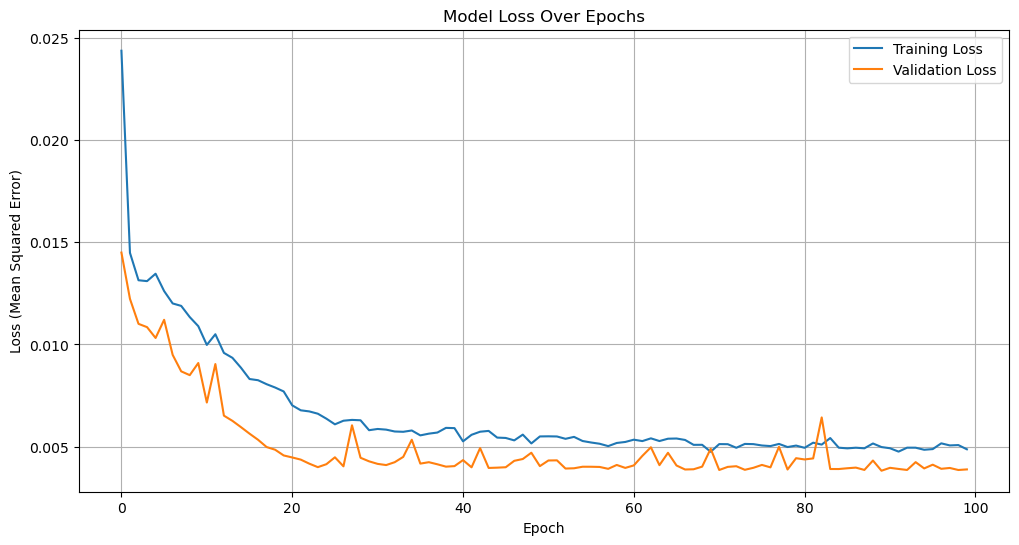

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


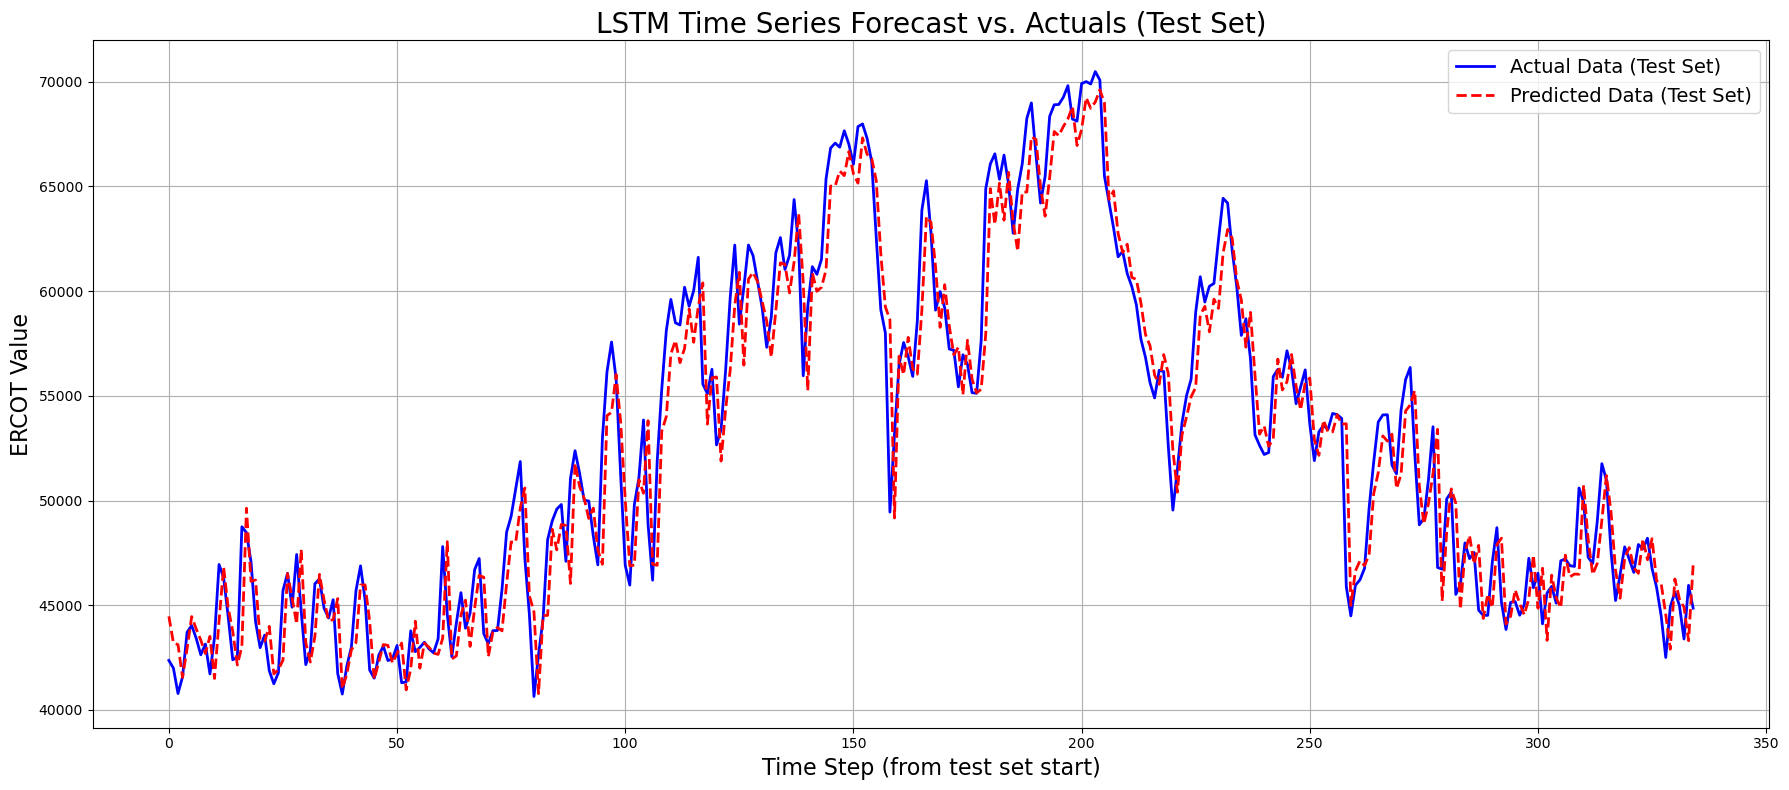

In [44]:
# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Inverse transform the actual test values to original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(18, 8)) # Increased figure size
plt.plot(y_test_original, label='Actual Data (Test Set)', color='blue', linewidth=2)
plt.plot(predictions, label='Predicted Data (Test Set)', color='red', linestyle='--', linewidth=2)
plt.title('LSTM Time Series Forecast vs. Actuals (Test Set)', fontsize=20)
plt.xlabel('Time Step (from test set start)', fontsize=16)
plt.ylabel('ERCOT Value', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model_rnn = Sequential() # Renaming the model variable to distinguish it from the LSTM one

# First SimpleRNN layer
# Similar to LSTM, input_shape for the first layer, return_sequences=True for stacking
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dropout(0.2)) # Dropout for regularization

# Second SimpleRNN layer
# return_sequences=False for the last recurrent layer before the Dense output
model_rnn.add(SimpleRNN(units=50, return_sequences=False))
model_rnn.add(Dropout(0.2))

# Output layer
model_rnn.add(Dense(units=1)) # Predicting a single value

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

model_rnn.summary()

C:\Users\Victus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the SimpleRNN model
# epochs: number of times the model will go through the entire training dataset
# batch_size: number of samples per gradient update
# validation_data: used to monitor loss on unseen data during training
print("Training SimpleRNN model...")
history_rnn = model_rnn.fit(X_train, y_train,
                            epochs=100, # Same epochs as before, adjust if needed
                            batch_size=32, # Same batch_size as before, adjust if needed
                            validation_data=(X_val, y_val), # Use the separate validation set
                            verbose=1)

print("\nSimpleRNN model training complete.")

Training SimpleRNN model...
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1855 - val_loss: 0.0158
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - val_loss: 0.0067
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - val_loss: 0.0105
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - val_loss: 0.0057
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - val_loss: 0.0052
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0072
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - val_loss: 0.0080
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - val_loss: 0.0043
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - val_loss: 0.0042
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - val_loss: 0.0060
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - val_loss: 0.0048
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


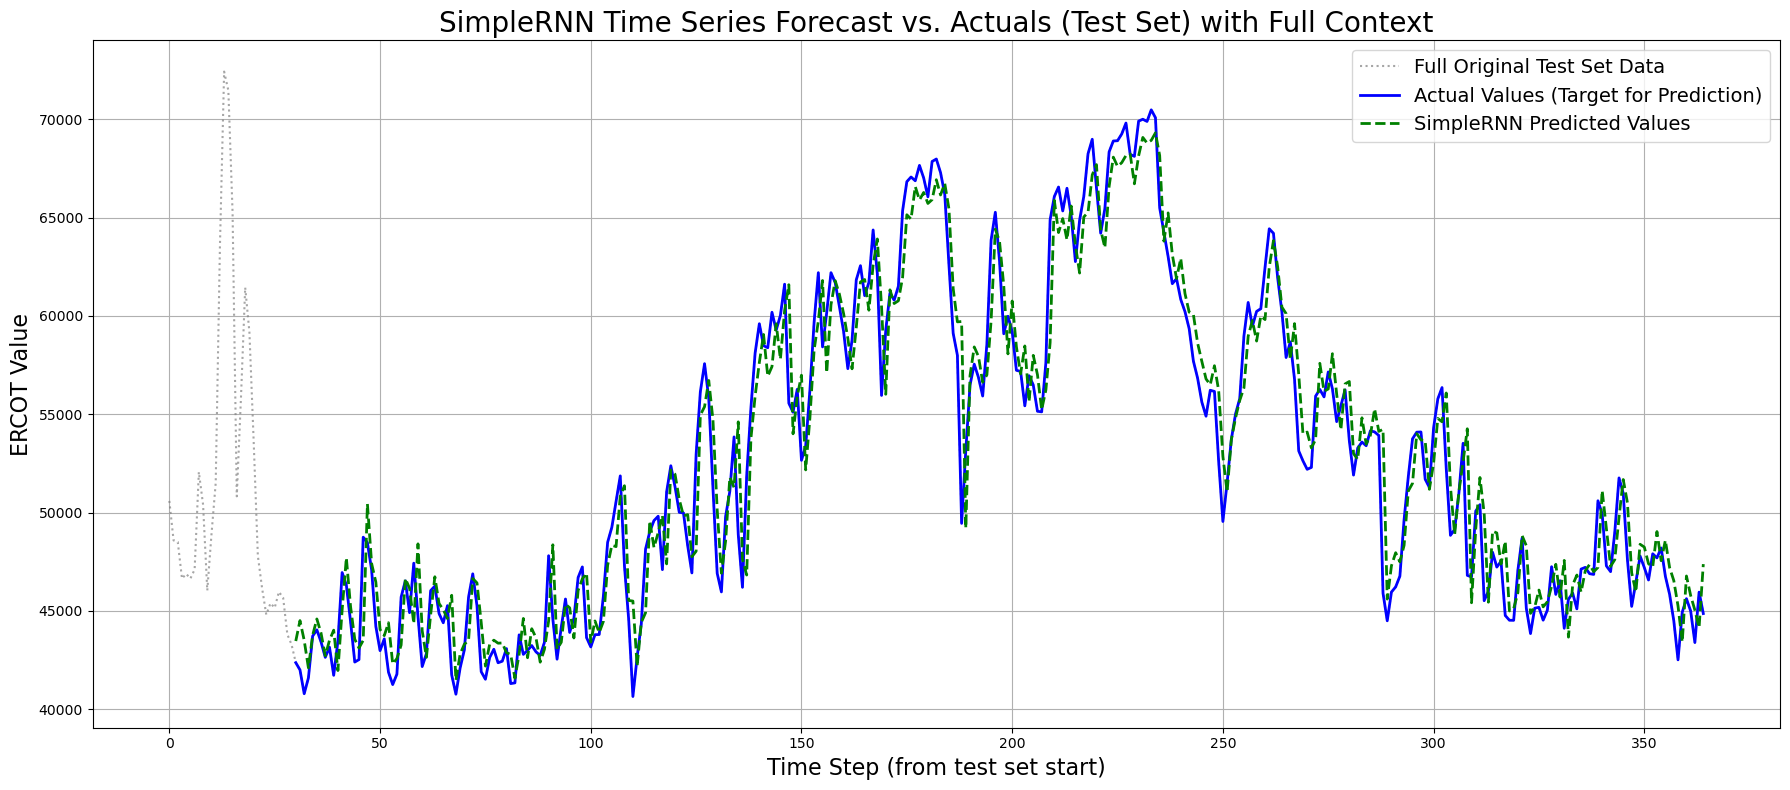

In [47]:
# Make predictions on the test set using the SimpleRNN model
predictions_scaled_rnn = model_rnn.predict(X_test)

# Inverse transform the SimpleRNN predictions to original scale
predictions_rnn = scaler.inverse_transform(predictions_scaled_rnn)

# We already have y_test_original from the previous LSTM plot, but regenerating for clarity
# Inverse transform the actual test values to original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the original unscaled test_set_copy values for plotting context
test_set_copy_unscaled_values = test_set_copy.values

# Plotting
plt.figure(figsize=(18, 8))

# Plot the entire unscaled test_set_copy for context
plt.plot(test_set_copy_unscaled_values, label='Full Original Test Set Data', color='gray', linestyle=':', alpha=0.7)

# Plot the actual data points that correspond to the predictions
# These begin 'sequence_length' steps into the test_set_copy
prediction_start_index = sequence_length
prediction_end_index = sequence_length + len(y_test_original)

plt.plot(np.arange(prediction_start_index, prediction_end_index),
         y_test_original, label='Actual Values (Target for Prediction)', color='blue', linewidth=2)
plt.plot(np.arange(prediction_start_index, prediction_end_index),
         predictions_rnn, label='SimpleRNN Predicted Values', color='green', linestyle='--', linewidth=2) # Distinct color/style for RNN

plt.title('SimpleRNN Time Series Forecast vs. Actuals (Test Set) with Full Context', fontsize=20)
plt.xlabel('Time Step (from test set start)', fontsize=16)
plt.ylabel('ERCOT Value', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

model_bilstm = Sequential() # Renaming the model variable

# First Bidirectional LSTM layer
# Wrap the LSTM layer with Bidirectional
model_bilstm.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model_bilstm.add(Dropout(0.2))

# Second Bidirectional LSTM layer (optional, but often improves performance)
# return_sequences=False for the last recurrent layer
model_bilstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model_bilstm.add(Dropout(0.2))

# Output layer
model_bilstm.add(Dense(units=1)) # Predicting a single value

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

model_bilstm.summary()

C:\Users\Victus\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 30, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the Bidirectional LSTM model
print("Training Bidirectional LSTM model...")
history_bilstm = model_bilstm.fit(X_train, y_train,
                                  epochs=100, # Same epochs as before, adjust if needed
                                  batch_size=32, # Same batch_size as before, adjust if needed
                                  validation_data=(X_val, y_val), # Use the separate validation set
                                  verbose=1)

print("\nBidirectional LSTM model training complete.")

Training Bidirectional LSTM model...
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0376 - val_loss: 0.0118
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - val_loss: 0.0092
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - val_loss: 0.0094
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - val_loss: 0.0082
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - val_loss: 0.0086
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - val_loss: 0.0074
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0081 - val_loss: 0.0073
Epoch 12/100
45

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


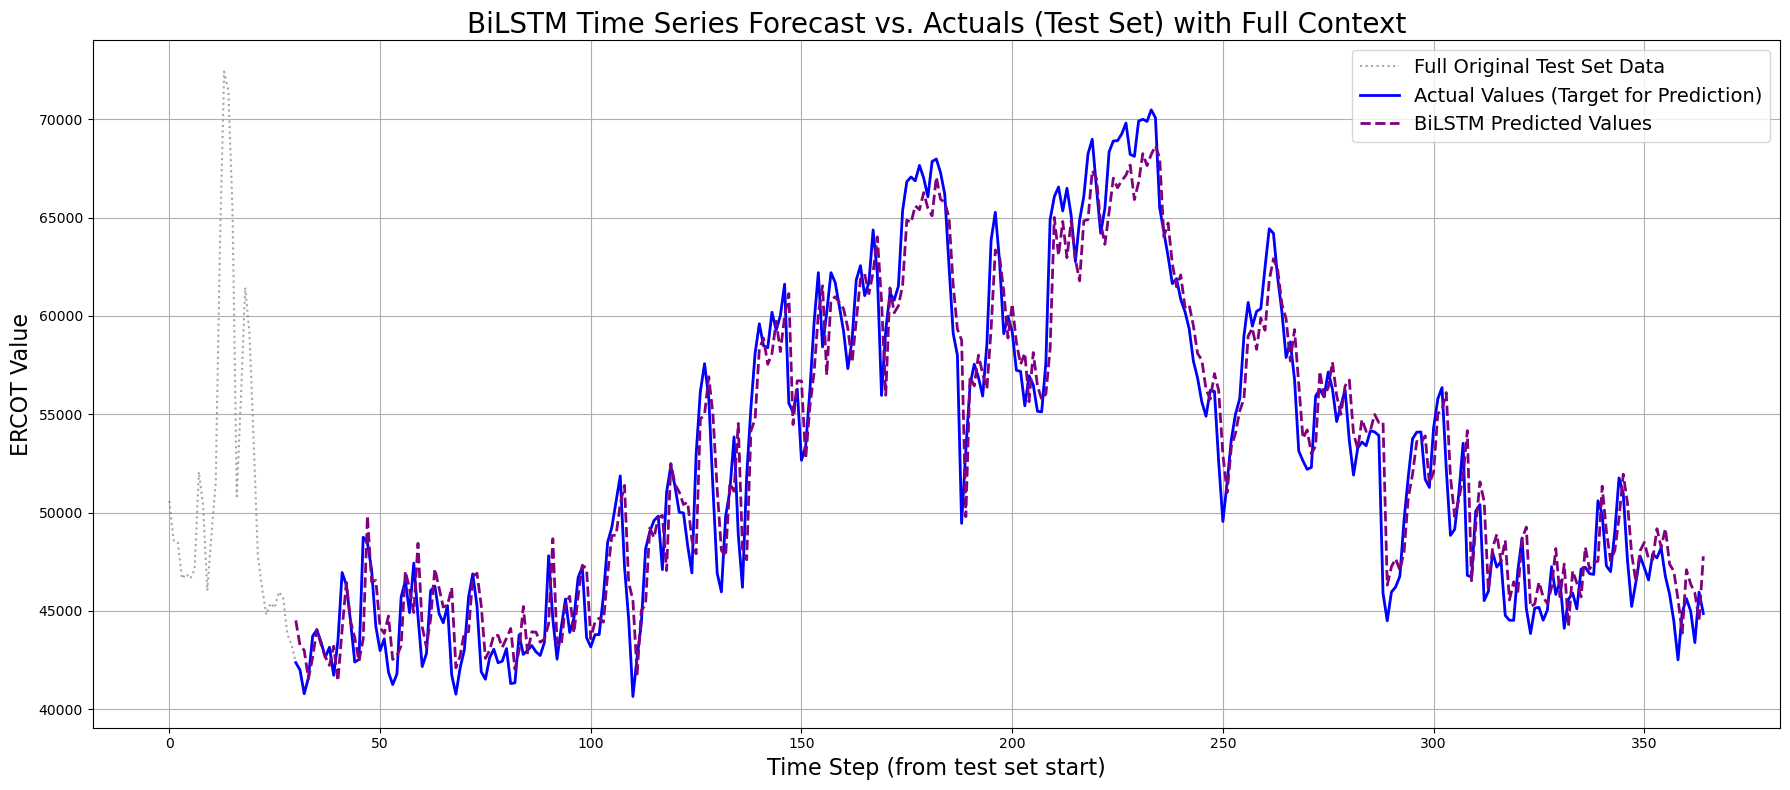

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set using the Bidirectional LSTM model
predictions_scaled_bilstm = model_bilstm.predict(X_test)

# Inverse transform the BiLSTM predictions to original scale
predictions_bilstm = scaler.inverse_transform(predictions_scaled_bilstm)

# We already have y_test_original and test_set_copy_unscaled_values available
# from previous steps, but re-defining for clarity in this block:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
test_set_copy_unscaled_values = test_set_copy.values

# Plotting
plt.figure(figsize=(18, 8))

# Plot the entire unscaled test_set_copy for context
plt.plot(test_set_copy_unscaled_values, label='Full Original Test Set Data', color='gray', linestyle=':', alpha=0.7)

# Plot the actual data points that correspond to the predictions
# These begin 'sequence_length' steps into the test_set_copy
prediction_start_index = sequence_length
prediction_end_index = sequence_length + len(y_test_original)

plt.plot(np.arange(prediction_start_index, prediction_end_index),
         y_test_original, label='Actual Values (Target for Prediction)', color='blue', linewidth=2)
plt.plot(np.arange(prediction_start_index, prediction_end_index),
         predictions_bilstm, label='BiLSTM Predicted Values', color='purple', linestyle='--', linewidth=2) # Distinct color/style for BiLSTM

plt.title('BiLSTM Time Series Forecast vs. Actuals (Test Set) with Full Context', fontsize=20)
plt.xlabel('Time Step (from test set start)', fontsize=16)
plt.ylabel('ERCOT Value', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
from prophet import Prophet
import pandas as pd # Already imported, but for clarity

# Create a DataFrame for Prophet from source_series_actual
# Prophet requires 'ds' for datetime and 'y' for the value
prophet_df = source_series.reset_index()
prophet_df.columns = ['ds', 'y']

# Ensure 'ds' column is datetime
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Now, split this prophet_df into train and test sets using the same logic as before
# The last num_test_points is for the test set, the rest is for training
prophet_train_df = prophet_df.iloc[:-num_test_points]
prophet_test_df = prophet_df.iloc[-num_test_points:] # This will be used for actuals in plotting

print(f"Prophet training data size: {len(prophet_train_df)}")
print(f"Prophet test data size: {len(prophet_test_df)}")
print("\nProphet data prepared.")

Prophet training data size: 1827
Prophet test data size: 365

Prophet data prepared.


In [52]:
# Initialize Prophet model
# You can add parameters here like seasonality_mode, yearly_seasonality, etc.
# For now, we'll use default yearly seasonality since your data has it
m = Prophet(yearly_seasonality=True, daily_seasonality=False) # Assuming daily is not the primary seasonality you want Prophet to model if it's already captured by your sequence_length for RNNs

# Fit the model to the training data
print("Fitting Prophet model...")
m.fit(prophet_train_df)
print("Prophet model fitted.")

# Create a DataFrame with future dates for forecasting (matching the test set)
future = m.make_future_dataframe(periods=len(prophet_test_df), include_history=False, freq='D')

# Make predictions
print("Making Prophet predictions...")
forecast = m.predict(future)
print("Prophet predictions generated.")

# Extract the predictions for the test period
# The 'yhat' column in the forecast DataFrame contains the predictions
predictions_prophet = forecast['yhat'].values

# The actual test values are from prophet_test_df
y_test_prophet_actual = prophet_test_df['y'].values

12:34:38 - cmdstanpy - INFO - Chain [1] start processing


Fitting Prophet model...


12:34:38 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.
Making Prophet predictions...
Prophet predictions generated.


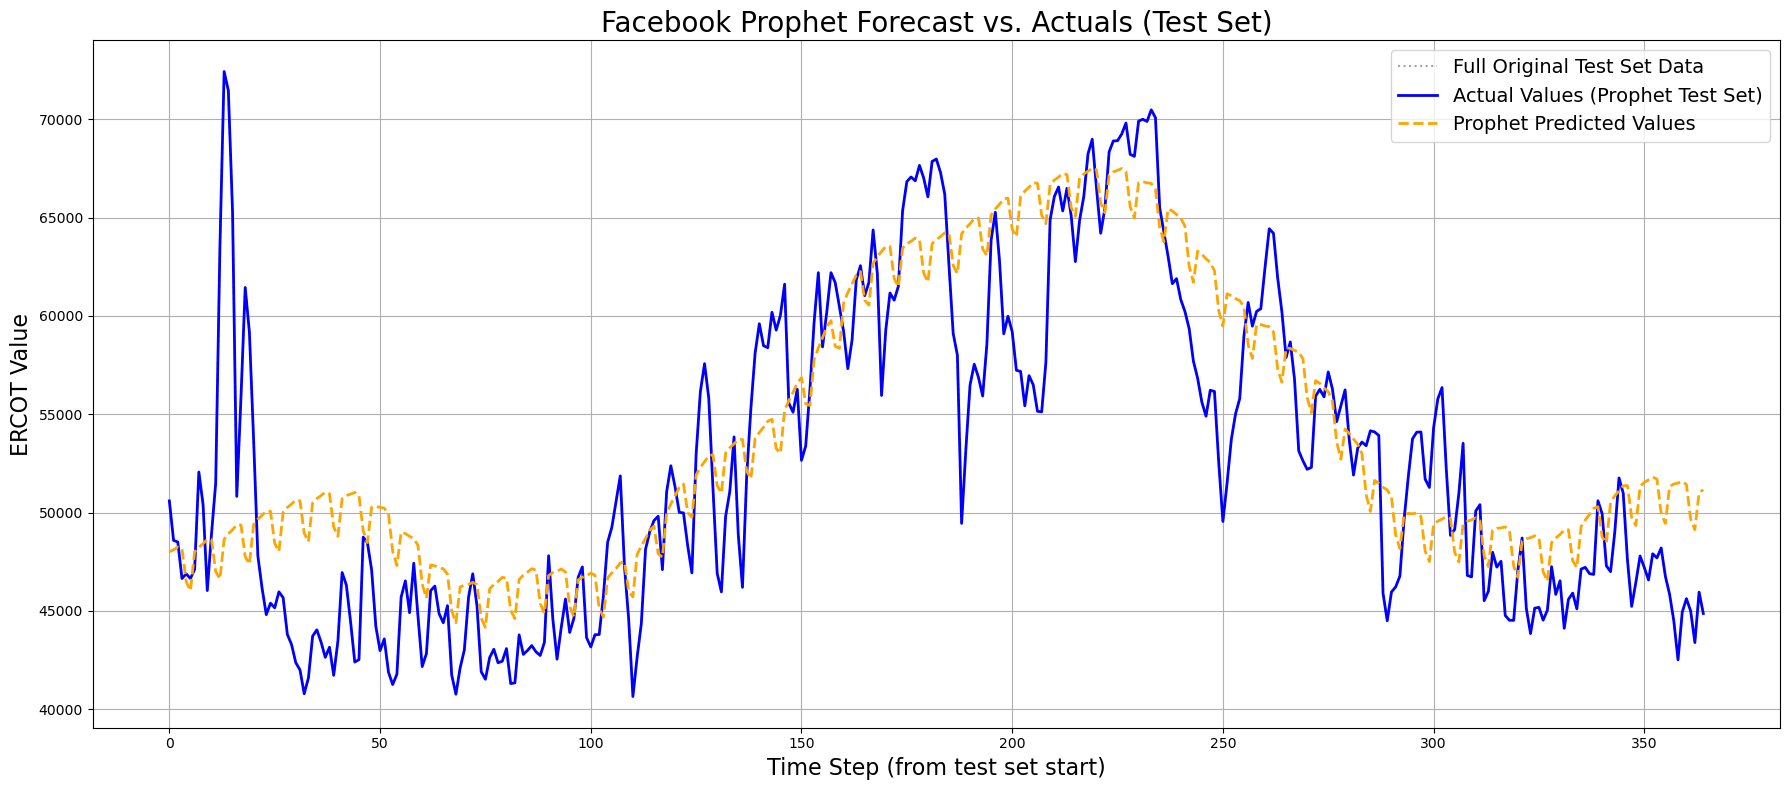

In [53]:
import matplotlib.pyplot as plt

# Get the original unscaled test_set_copy values for plotting context
# (This variable should already be available from previous cells)
test_set_copy_unscaled_values = test_set_copy.values

# Plotting
plt.figure(figsize=(18, 8))

# Plot the entire unscaled test_set_copy for context
plt.plot(test_set_copy_unscaled_values, label='Full Original Test Set Data', color='gray', linestyle=':', alpha=0.7)

# Plot the actual data points that correspond to the predictions
# For Prophet, the predictions directly correspond to the test_set_copy_unscaled_values in sequence
# However, for consistency with RNN plots (which had a sequence_length offset for targets),
# we'll plot them starting from the same index.
# Note: Prophet forecasts directly for each future point, so no sequence_length offset is needed for its own plot.
# But to align with RNN plots for comparison, we can use the same indexing logic.

# Prophet's predictions (yhat) directly correspond to the future dates.
# So we simply plot predictions_prophet against its length, which is num_test_points
# To align it on the *same x-axis scale* as the other plots (which start from the beginning of test_set_copy),
# we calculate the offset.
prophet_plot_start_index = len(train_set) + len(validation_set)
prophet_actual_plot_indices = np.arange(prophet_plot_start_index, prophet_plot_start_index + len(y_test_prophet_actual))
prophet_prediction_plot_indices = np.arange(prophet_plot_start_index, prophet_plot_start_index + len(predictions_prophet))


# In this particular plot, for simplicity and direct comparison within the test_set,
# we can just plot relative to the start of the test set for Prophet, similar to how y_test_original was plotted.
# Prophet's forecast 'forecast' already provides 'ds' which aligns to dates.
# For direct comparison with other plots which use 'Time Step (from test set start)', we use relative indices.
plt.plot(np.arange(len(y_test_prophet_actual)), y_test_prophet_actual,
         label='Actual Values (Prophet Test Set)', color='blue', linewidth=2)
plt.plot(np.arange(len(predictions_prophet)), predictions_prophet,
         label='Prophet Predicted Values', color='orange', linestyle='--', linewidth=2) # Distinct color/style for Prophet

plt.title('Facebook Prophet Forecast vs. Actuals (Test Set)', fontsize=20)
plt.xlabel('Time Step (from test set start)', fontsize=16)
plt.ylabel('ERCOT Value', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

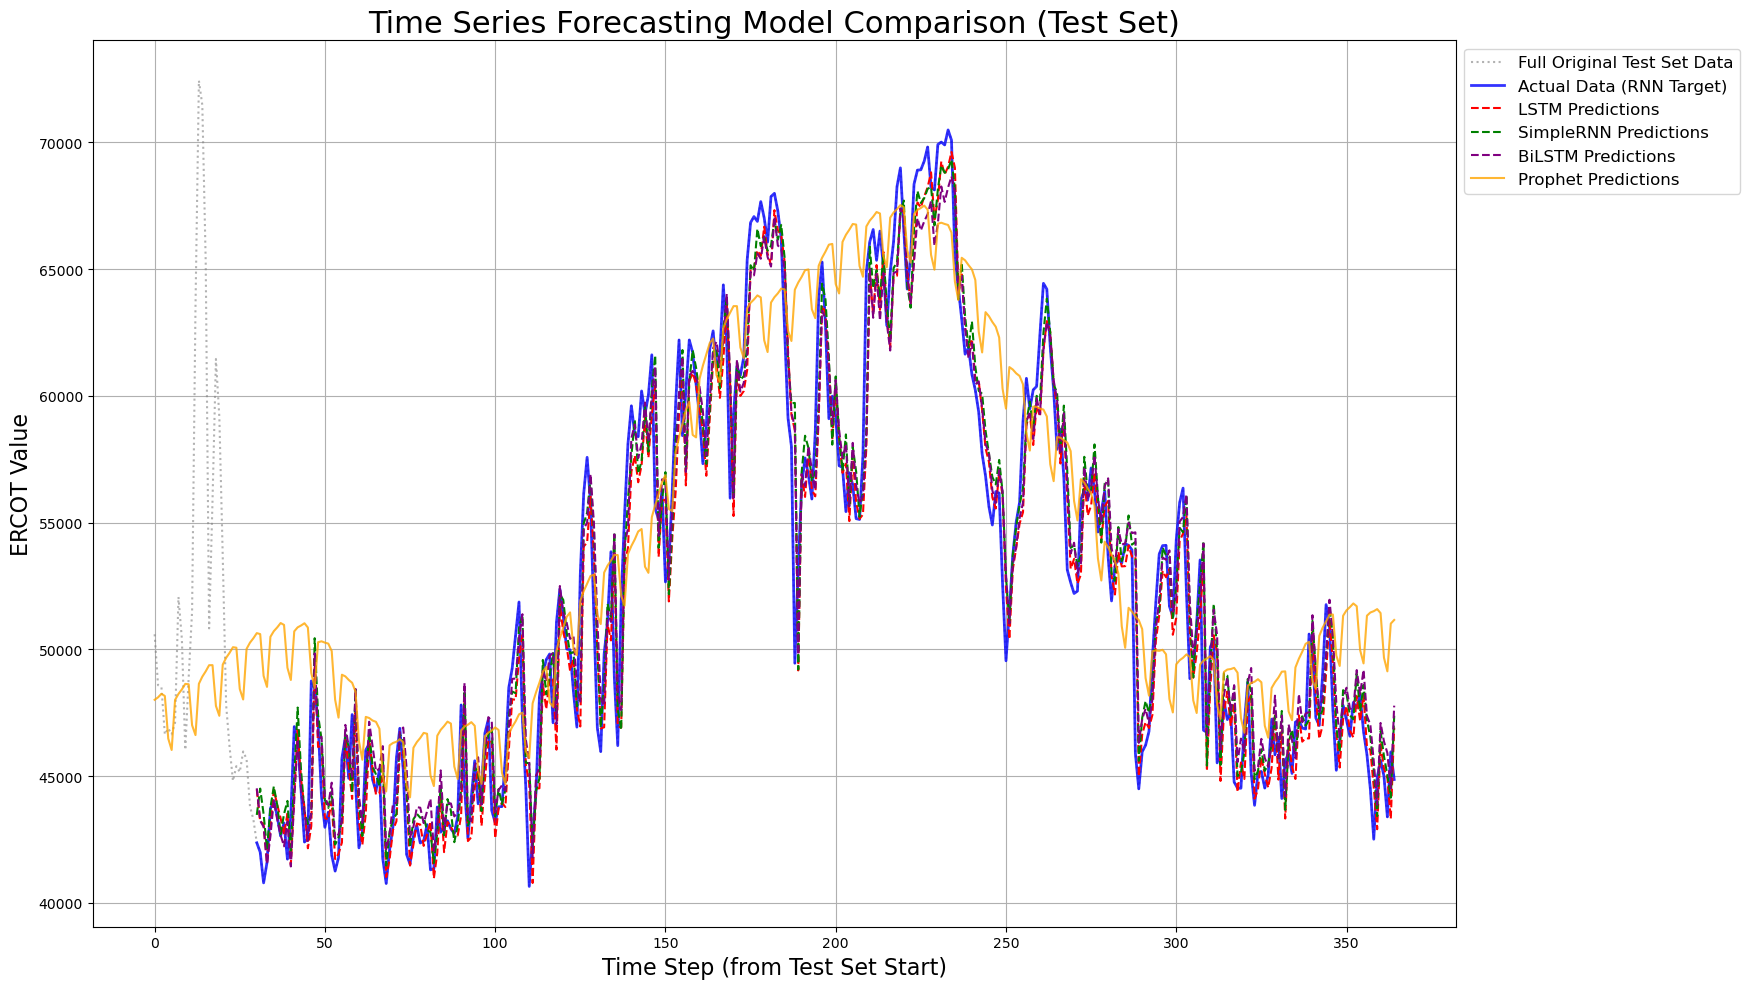

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure these variables are available from your previous runs:
# y_test_original: Actual values for RNN-based models' prediction period
# predictions: LSTM model predictions
# predictions_rnn: SimpleRNN model predictions
# predictions_bilstm: BiLSTM model predictions
# predictions_prophet: Prophet model predictions
# test_set_copy_unscaled_values: Full original test set for context
# sequence_length: Look-back window used for RNNs

# If you rerun this cell independently, ensure the above variables are defined.
# For consistency, y_test_prophet_actual should be similar to test_set_copy.values[-len(predictions_prophet):]
# Let's ensure we use the actual values that directly correspond to the prediction periods for each model.

# Aligning X-axis for RNN models (they start after sequence_length)
rnn_prediction_start_index = sequence_length
rnn_prediction_end_index = sequence_length + len(y_test_original)
rnn_x_axis = np.arange(rnn_prediction_start_index, rnn_prediction_end_index)

# Aligning X-axis for Prophet model (it starts from the beginning of the test set)
prophet_x_axis = np.arange(len(predictions_prophet))

# Plotting the final comparison
plt.figure(figsize=(20, 10)) # Even larger figure for multiple lines

# 1. Plot the Full Original Test Set Data for context
plt.plot(test_set_copy_unscaled_values, label='Full Original Test Set Data', color='gray', linestyle=':', alpha=0.6, linewidth=1.5)

# 2. Plot the Actuals for RNN-based models (they align starting at sequence_length)
plt.plot(rnn_x_axis, y_test_original, label='Actual Data (RNN Target)', color='blue', linewidth=2, alpha=0.8)

# 3. Plot Predictions from each model
plt.plot(rnn_x_axis, predictions, label='LSTM Predictions', color='red', linestyle='--', linewidth=1.5)
plt.plot(rnn_x_axis, predictions_rnn, label='SimpleRNN Predictions', color='green', linestyle='--', linewidth=1.5)
plt.plot(rnn_x_axis, predictions_bilstm, label='BiLSTM Predictions', color='purple', linestyle='--', linewidth=1.5)

# 4. Plot Prophet Predictions
# Prophet's predictions start from the beginning of the test set,
# so their x-axis can be from 0 to len(predictions_prophet)-1 relative to test set start.
plt.plot(prophet_x_axis, predictions_prophet, label='Prophet Predictions', color='orange', linestyle='-', linewidth=1.5, alpha=0.8)


plt.title('Time Series Forecasting Model Comparison (Test Set)', fontsize=22)
plt.xlabel('Time Step (from Test Set Start)', fontsize=16)
plt.ylabel('ERCOT Value', fontsize=16)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1)) # Move legend outside to prevent overlap
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout for external legend
plt.show()

In [62]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- Define MAPE function ---
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    # Handle cases where y_true might be zero or very small
    # A common way to handle near-zero actuals is to add a small epsilon
    # or set the error to 0 if both are 0.
    # For robust MAPE, ensure y_true > 0.
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not np.any(non_zero_mask): # All true values are zero, MAPE is undefined/problematic
        return np.nan # Or choose a very large number/specific error message

    # Calculate MAPE only for non-zero true values
    mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    return mape

# --- Prepare Actuals and Predictions for consistent calculation ---

# Actuals for RNN models (LSTM, SimpleRNN, BiLSTM)
# These correspond to the data *after* the sequence_length look-back period in the test set.
actuals_rnn = y_test_original.flatten()

# Actuals for Prophet model
# Prophet predicts over the entire test set period from its start.
# y_test_prophet_actual (from prophet_test_df['y']) is already the actuals for the whole test set.
actuals_prophet = y_test_prophet_actual.flatten()

# Ensure all prediction arrays are flattened
predictions_lstm_flat = predictions.flatten()
predictions_rnn_flat = predictions_rnn.flatten()
predictions_bilstm_flat = predictions_bilstm.flatten()
predictions_prophet_flat = predictions_prophet.flatten()

# --- Create a dictionary to store metrics ---
metrics_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MAPE (%)'])

# --- Calculate metrics for each model ---

# LSTM
mse_lstm = mean_squared_error(actuals_rnn, predictions_lstm_flat)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(actuals_rnn, predictions_lstm_flat)
mape_lstm = mean_absolute_percentage_error(actuals_rnn, predictions_lstm_flat)
metrics_df.loc['LSTM'] = [mse_lstm, rmse_lstm, mae_lstm, mape_lstm]

# SimpleRNN
mse_rnn = mean_squared_error(actuals_rnn, predictions_rnn_flat)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(actuals_rnn, predictions_rnn_flat)
mape_rnn = mean_absolute_percentage_error(actuals_rnn, predictions_rnn_flat)
metrics_df.loc['SimpleRNN'] = [mse_rnn, rmse_rnn, mae_rnn, mape_rnn]

# BiLSTM
mse_bilstm = mean_squared_error(actuals_rnn, predictions_bilstm_flat)
rmse_bilstm = np.sqrt(mse_bilstm)
mae_bilstm = mean_absolute_error(actuals_rnn, predictions_bilstm_flat)
mape_bilstm = mean_absolute_percentage_error(actuals_rnn, predictions_bilstm_flat)
metrics_df.loc['BiLSTM'] = [mse_bilstm, rmse_bilstm, mae_bilstm, mape_bilstm]

# Prophet
# Prophet's predictions cover the *entire* test_set period, so we compare it against that full period's actuals
mse_prophet = mean_squared_error(actuals_prophet, predictions_prophet_flat)
rmse_prophet = np.sqrt(mse_prophet)
mae_prophet = mean_absolute_error(actuals_prophet, predictions_prophet_flat)
mape_prophet = mean_absolute_percentage_error(actuals_prophet, predictions_prophet_flat)
metrics_df.loc['Prophet'] = [mse_prophet, rmse_prophet, mae_prophet, mape_prophet]


# Display the comparison table
print("--- Model Performance Comparison (Test Set) ---")
print(metrics_df.round(2))

--- Model Performance Comparison (Test Set) ---
                   MSE     RMSE      MAE  MAPE (%)
LSTM        4296583.32  2072.82  1563.84      2.99
SimpleRNN   4122326.28  2030.35  1518.15      2.94
BiLSTM      4513408.13  2124.48  1620.54      3.13
Prophet    22775838.63  4772.40  3628.61      7.08
